In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 25)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Movie dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Movie dataset/tmdb_5000_credits.csv
/content/drive/My Drive/Movie dataset/tmdb_5000_movies.csv


In [3]:
# load dataset
movie = pd.read_csv("/content/drive/My Drive/Movie dataset/tmdb_5000_movies.csv")
credit = pd.read_csv("/content/drive/My Drive/Movie dataset/tmdb_5000_credits.csv")

In [4]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credit.columns = ['id','cast', 'title', 'crew']
movie= movie.merge(credit, on='id')

In [7]:
movie.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,title_y,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [10]:
def cloud(col):    
    wcloud = " ".join(f for f in movie[col])
    wc_ = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS)
    wc_.generate(wcloud)
    plt.subplots(figsize=(10,6))
    plt.imshow(wc_, interpolation="bilinear")
    plt.axis("off")

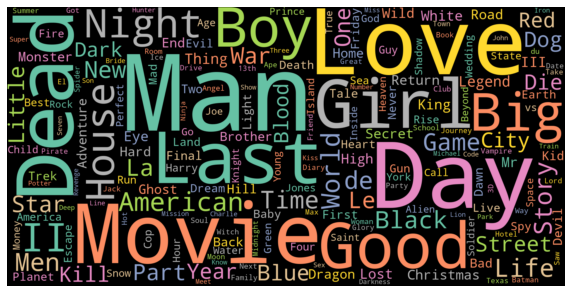

In [11]:
cloud("original_title")

In [12]:
movie["overview"] = movie["overview"].fillna("")

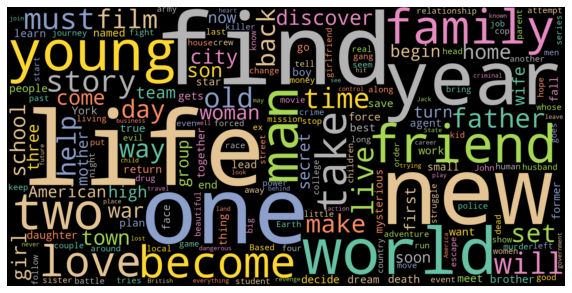

In [13]:
cloud("overview")

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(movie["overview"])

tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [15]:
# we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [16]:
# reverse map of indices and movie original_title
indices = pd.Series(movie.index, index=movie['original_title']).drop_duplicates()

In [17]:
def get_recommendation(title, cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movies = [i[0] for i in sim_scores]
    movies = movie["original_title"].iloc[movies]
    return movies

In [18]:
# IF you search "Spectre", name of the movies below will be recommended
get_recommendation('Spectre', cosine_sim)

1343    Never Say Never Again
4071    From Russia with Love
3162              Thunderball
1717               Safe Haven
11          Quantum of Solace
4339                   Dr. No
29                    Skyfall
1880              Dance Flick
3336     Diamonds Are Forever
1743                Octopussy
Name: original_title, dtype: object

In [19]:
get_recommendation("John Carter", cosine_sim)

1254                          Get Carter
4161         The Marine 4: Moving Target
2932                        Raising Cain
3349                           Desperado
1307                       The Hurricane
3068                         Rescue Dawn
345                          Rush Hour 2
581              Star Trek: Insurrection
2998                               Devil
4274    Eddie: The Sleepwalking Cannibal
Name: original_title, dtype: object

In [21]:
get_recommendation("Avengers: Age of Ultron", cosine_sim)

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: original_title, dtype: object

In [22]:
get_recommendation("Mission: Impossible II", cosine_sim)

139                  Mission: Impossible III
425                      Mission: Impossible
134       Mission: Impossible - Rogue Nation
153     Mission: Impossible - Ghost Protocol
1993                       Final Destination
1281                                 Hackers
3002                       The Lawnmower Man
2398                                  Hitman
4689               The Trials Of Darryl Hunt
3764                                   Topaz
Name: original_title, dtype: object

In [23]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['keywords', 'genres']
for feature in features:
    movie[feature] = movie[feature].apply(literal_eval)

In [24]:
movie[['original_title', 'keywords', 'genres']].head(3)

,original_title,keywords,genres
0,Avatar,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,Pirates of the Caribbean: At World's End,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Spectre,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [25]:
# Extract list of genres
def list_genres(x):
    l = [d['name'] for d in x]
    return(l)
movie['genres'] = movie['genres'].apply(list_genres)

# Extract list of keywords
def list_keyword(y):
    i = [a['name'] for a in y]
    return(i)
movie['keywords'] = movie['keywords'].apply(list_keyword)

In [26]:
# join genre and keywords
def genre(x):
    return ''.join(' '.join(x['genres']) + ' ' + ' '.join(x['keywords']))

# new column
movie['mix'] = movie.apply(genre, axis=1)

In [27]:
movie["mix"]

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states–mexico bar...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TV Movie date love at fir...
4801                                                     
4802     Documentary obsession camcorder crush dream girl
Name: mix, Length: 4803, dtype: object

In [28]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

countvect = CountVectorizer(stop_words="english")

countvect_mat = tfidf.fit_transform(movie["mix"])

countvect_mat

<4803x7069 sparse matrix of type '<class 'numpy.float64'>'
	with 60983 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(countvect_mat, countvect_mat)

In [30]:
# reverse map of indices and movie original_title
movie = movie.reset_index()
indices = pd.Series(movie.index, index=movie['original_title'])

In [31]:
get_recommendation("John Carter", cos_sim)

373           Mission to Mars
2964    The Last Days on Mars
754                 Planet 51
141           Mars Needs Moms
487                Red Planet
1319                  Riddick
752       My Favorite Martian
0                      Avatar
278        Planet of the Apes
541                   Soldier
Name: original_title, dtype: object

In [32]:
get_recommendation("Soldier", cos_sim)

1319                      Riddick
0                          Avatar
278            Planet of the Apes
754                     Planet 51
2047    Megiddo: The Omega Code 2
193                   After Earth
1642                       Splice
838                        Alien³
3158                        Alien
4332               Silent Running
Name: original_title, dtype: object

In [33]:
get_recommendation("Stuart Little 2", cos_sim)

2270                                             Zambezia
4301                                        The Blue Bird
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
1983                                     Meet the Deedles
2811                                  Ernest et Célestine
2899                                                 兔侠传奇
2182                               Pooh's Heffalump Movie
3038                                Hey Arnold! The Movie
4125    The Lost Medallion: The Adventures of Billy Stone
1306                          Dragon Nest: Warriors' Dawn
Name: original_title, dtype: object

In [34]:
# avarage rating
avg = movie["vote_average"].mean()
#  We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.
q = movie["vote_count"].quantile(0.9)

In [35]:
print(avg)
print(q)

6.092171559442011
1838.4000000000015


In [36]:
movies = movie[movie["vote_count"] >= q]

In [37]:
#qualified movies
# function of weighted_rating 
def weighted_rating(x, q=q, avg=avg):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+q) * R) + (q/(q+v) * avg)

In [38]:
# apply for qualfied movies
movies["score"] = movies.apply(weighted_rating, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
# Sort movies based on score calculated above
movies = movies.sort_values('score', ascending=False)

# Print the top 10 movies
listed = movies[['original_title', 'vote_count', 'vote_average', 'score', "popularity"]].head(10)

In [40]:
listed

,original_title,vote_count,vote_average,score,popularity
1881,The Shawshank Redemption,8205,8.5,8.059258,136.747729
662,Fight Club,9413,8.3,7.939256,146.757391
65,The Dark Knight,12002,8.2,7.920020,187.322927
3232,Pulp Fiction,8428,8.3,7.904645,121.463076
96,Inception,13752,8.1,7.863239,167.583710
3337,The Godfather,5893,8.4,7.851236,143.659698
95,Interstellar,10867,8.1,7.809479,724.247784
809,Forrest Gump,7927,8.2,7.803188,138.133331
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243,123.630332
1990,The Empire Strikes Back,5879,8.2,7.697884,78.517830


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Movie Vs Score')

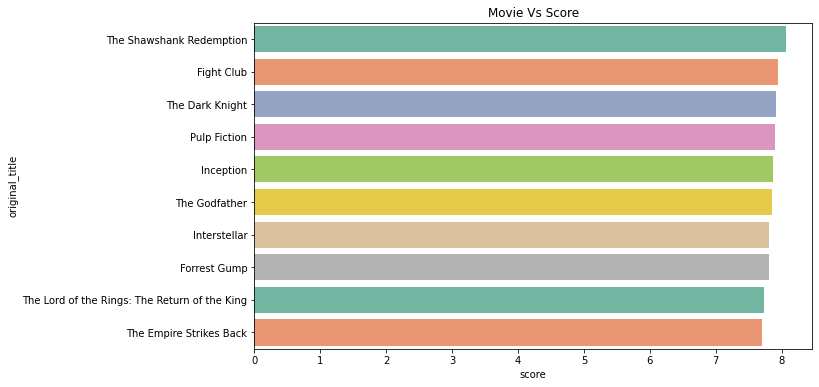

In [41]:
# Visualize
import seaborn as sns


plt.subplots(figsize=(10,6))
sns.barplot(listed["score"], listed["original_title"], palette="Set2")
plt.title("Movie Vs Score")

Text(0.5, 1.0, 'Popular Movies')

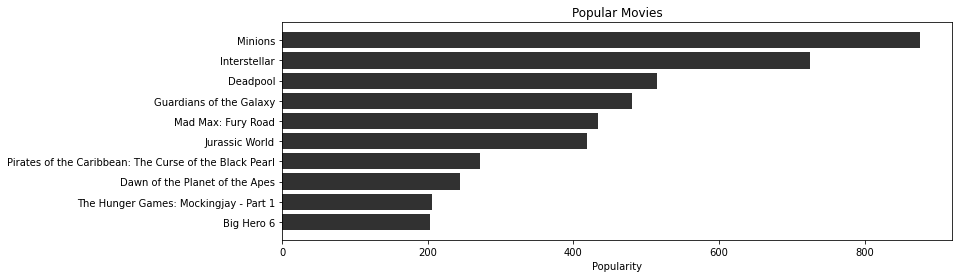

In [42]:
#Trending Movies
popular= movies.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(popular['original_title'].head(10),popular['popularity'].head(10), align='center',
        color="#313131")
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")